In [235]:
#importing the required libraries
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import datasets, linear_model, metrics

In [236]:
#reading the dataset
df_data = pd.read_csv("UsedCarData.csv")

Data Exploration

In [237]:
df_data.head()

,Sales_ID,name,year,selling_price,km_driven,Region,State or Province,City,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,sold
0,1,Maruti,2014,450000,145500,East,District of Columbia,Washington,Diesel,Individual,Manual,First_Owner,23.40,1248,74.00,190Nm@ 2000rpm,5,Y
1,2,Skoda,2014,370000,120000,East,New York,New York City,Diesel,Individual,Manual,Second_Owner,21.14,1498,103.52,250Nm@ 1500-2500rpm,5,Y
2,3,Honda,2006,158000,140000,Central,Illinois,Chicago,Petrol,Individual,Manual,Third_Owner,17.70,1497,78.00,"12.7@ 2,700(kgm@ rpm)",5,Y
3,4,Hyundai,2010,225000,127000,Central,Illinois,Chicago,Diesel,Individual,Manual,First_Owner,23.00,1396,90.00,22.4 kgm at 1750-2750rpm,5,Y
4,5,Maruti,2007,130000,120000,East,New York,New York City,Petrol,Individual,Manual,First_Owner,16.10,1298,88.20,"11.5@ 4,500(kgm@ rpm)",5,Y


In [238]:
df_data.count()

Sales_ID             7906
name                 7906
year                 7906
selling_price        7906
km_driven            7906
Region               7906
State or Province    7906
City                 7906
fuel                 7906
seller_type          7906
transmission         7906
owner                7906
mileage              7906
engine               7906
max_power            7906
torque               7906
seats                7906
sold                 7906
dtype: int64

In [239]:
df_data.describe()

,Sales_ID,year,selling_price,km_driven,mileage,engine,max_power,seats
count,7906.000000,7906.000000,7.906000e+03,7.906000e+03,7906.000000,7906.000000,7906.000000,7906.000000
mean,4070.106248,2013.983936,6.498137e+05,6.918866e+04,19.419861,1458.708829,91.587374,5.416393
std,2345.770159,3.863695,8.135827e+05,5.679230e+04,4.036263,503.893057,35.747216,0.959208
min,1.000000,1994.000000,2.999900e+04,1.000000e+00,0.000000,624.000000,32.800000,2.000000
25%,2037.250000,2012.000000,2.700000e+05,3.500000e+04,16.780000,1197.000000,68.050000,5.000000
50%,4076.500000,2015.000000,4.500000e+05,6.000000e+04,19.300000,1248.000000,82.000000,5.000000
75%,6102.000000,2017.000000,6.900000e+05,9.542500e+04,22.320000,1582.000000,102.000000,5.000000
max,8128.000000,2020.000000,1.000000e+07,2.360457e+06,42.000000,3604.000000,400.000000,14.000000


Data preprocessing and Visualization

In [240]:
df_data.isnull().sum()

Sales_ID             0
name                 0
year                 0
selling_price        0
km_driven            0
Region               0
State or Province    0
City                 0
fuel                 0
seller_type          0
transmission         0
owner                0
mileage              0
engine               0
max_power            0
torque               0
seats                0
sold                 0
dtype: int64

/var/folders/c6/l07hm63n1bl3v3b51p2g2cdw0000gn/T/ipykernel_37339/1512619681.py:6: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  (corr


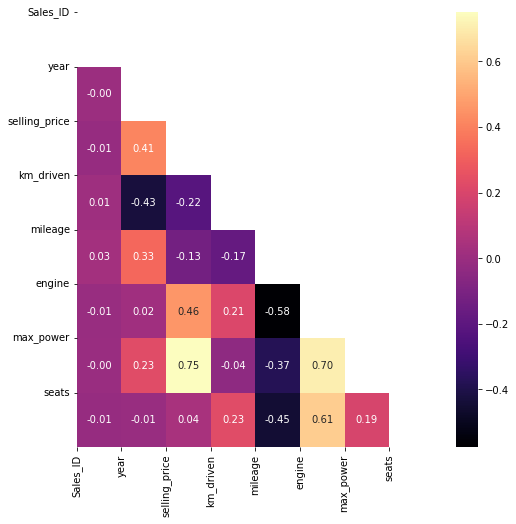

In [241]:
#displaying one corner heatmap to show correlation between variables
corr = df_data.corr()
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
corr[mask] = np.nan
(corr
 .style
 .background_gradient(cmap='coolwarm', axis=None, vmin=-1, vmax=1)
 .highlight_null(null_color='#f1f1f1')  # Color NaNs grey
 .set_precision(2))
#Plot figsize
fig, ax = plt.subplots(figsize=(8, 8))
#Generate Heat Map, allow annotations and place floats in map
sns.heatmap(corr, cmap='magma', annot=True, fmt=".2f")
#Apply xticks
plt.xticks(range(len(corr.columns)), corr.columns);
#Apply yticks
plt.yticks(range(len(corr.columns)), corr.columns)
#show plot
plt.show()

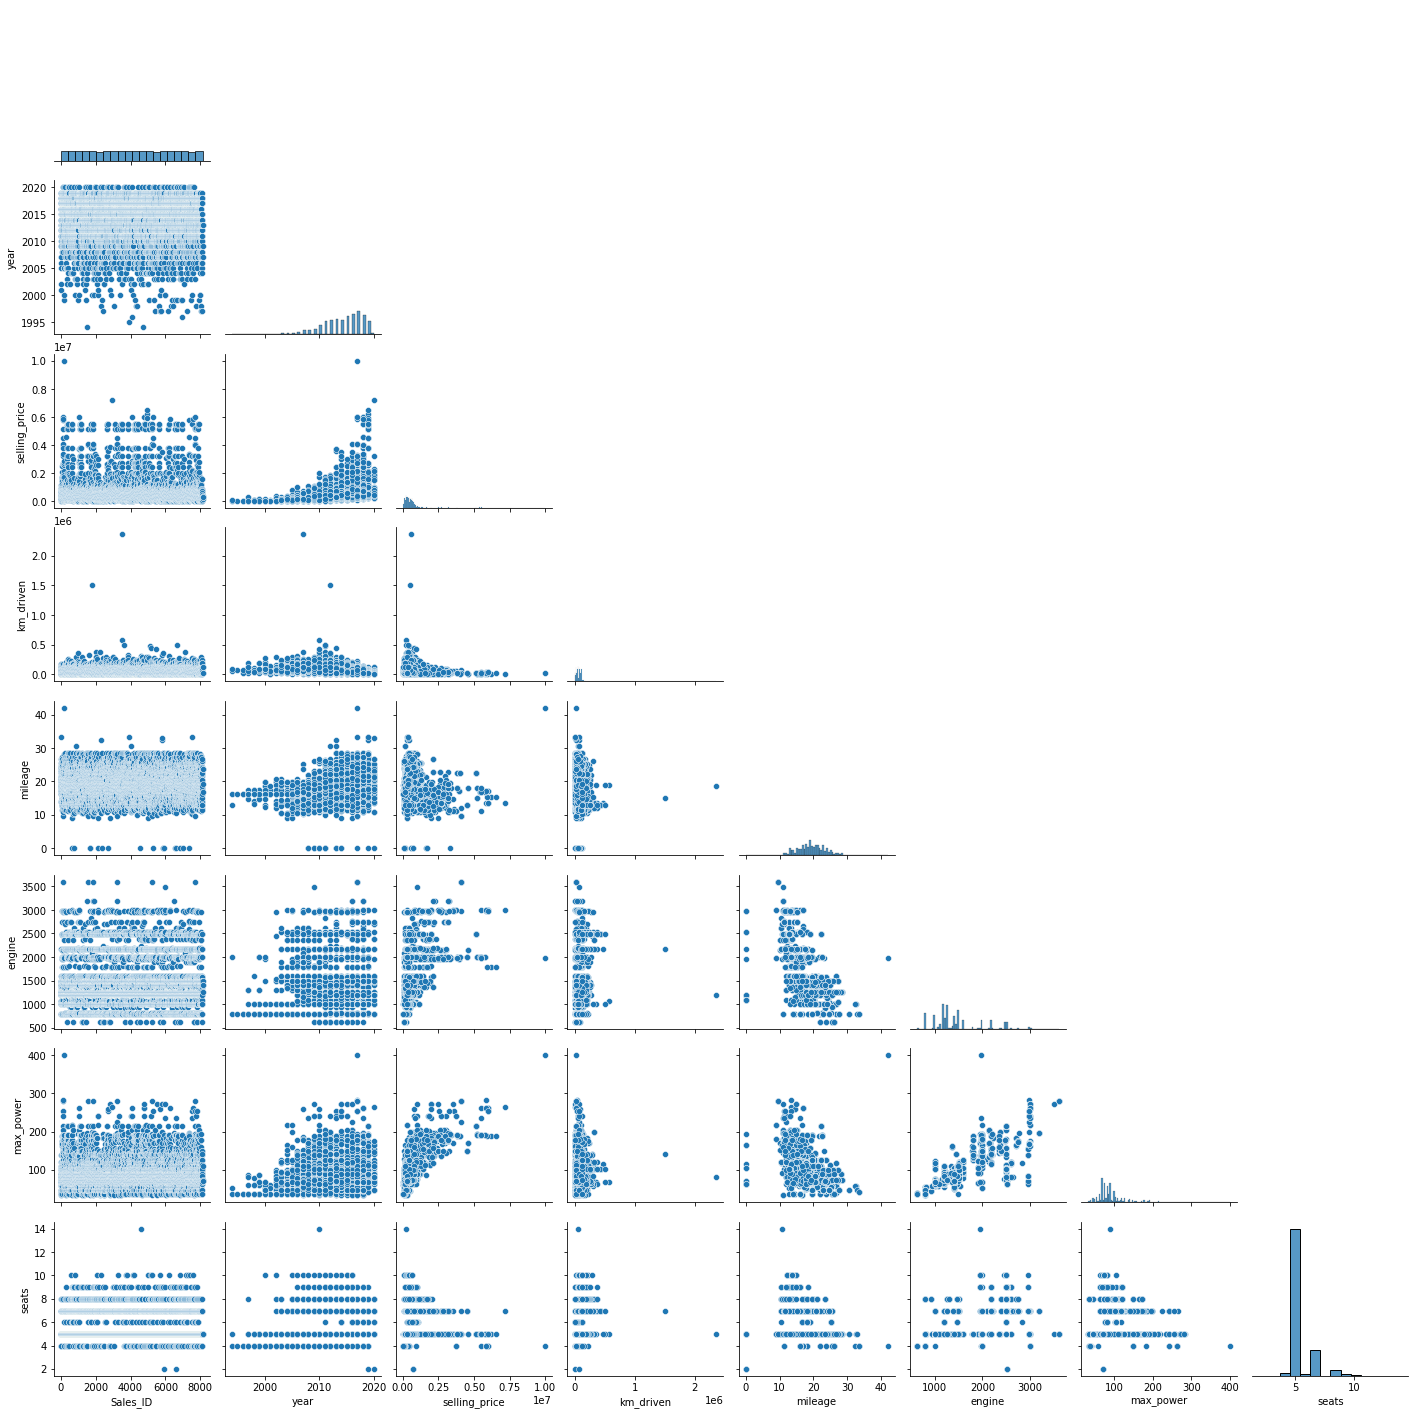

In [242]:
#plotting pairwise relarionship in dataset
sns.pairplot(df_data, corner = True)
plt.show()

From the Correlation graphs above, we can see that the our target variable i.e. selling price is positively correlated with max_power, year and it is negatively correlated with km_driven.

To avoid collinearity we need to remove either of the max_power or engine as they are also positively correlated and thus can cause some issues with our model prediction.

In [243]:
df_data.head()

,Sales_ID,name,year,selling_price,km_driven,Region,State or Province,City,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,sold
0,1,Maruti,2014,450000,145500,East,District of Columbia,Washington,Diesel,Individual,Manual,First_Owner,23.40,1248,74.00,190Nm@ 2000rpm,5,Y
1,2,Skoda,2014,370000,120000,East,New York,New York City,Diesel,Individual,Manual,Second_Owner,21.14,1498,103.52,250Nm@ 1500-2500rpm,5,Y
2,3,Honda,2006,158000,140000,Central,Illinois,Chicago,Petrol,Individual,Manual,Third_Owner,17.70,1497,78.00,"12.7@ 2,700(kgm@ rpm)",5,Y
3,4,Hyundai,2010,225000,127000,Central,Illinois,Chicago,Diesel,Individual,Manual,First_Owner,23.00,1396,90.00,22.4 kgm at 1750-2750rpm,5,Y
4,5,Maruti,2007,130000,120000,East,New York,New York City,Petrol,Individual,Manual,First_Owner,16.10,1298,88.20,"11.5@ 4,500(kgm@ rpm)",5,Y


Answering some of the common questions from data


<AxesSubplot: >

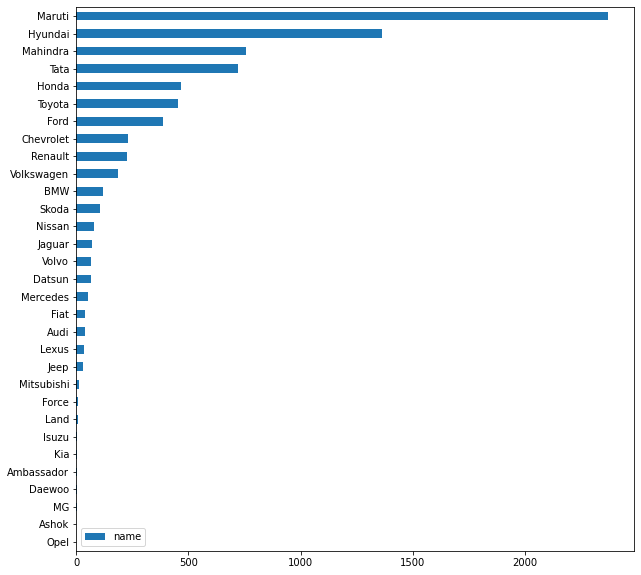

In [244]:
#numbers of cars being sold by brands
df_brands = pd.DataFrame(df_data['name'].value_counts())
df_brands.sort_values(by = 'name').plot(kind = "barh" 
               ,figsize = (10,10))


Maruti and Hyundai tops the number of vehicles sold

<AxesSubplot: >

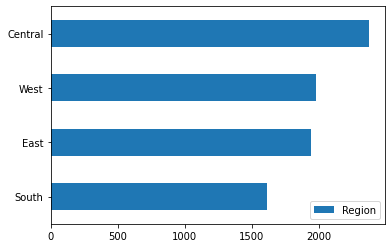

In [245]:
#numbers of cars sold by locations
df_loc = pd.DataFrame(df_data['Region'].value_counts())
df_loc.sort_values(by = "Region").plot.barh()

<AxesSubplot: >

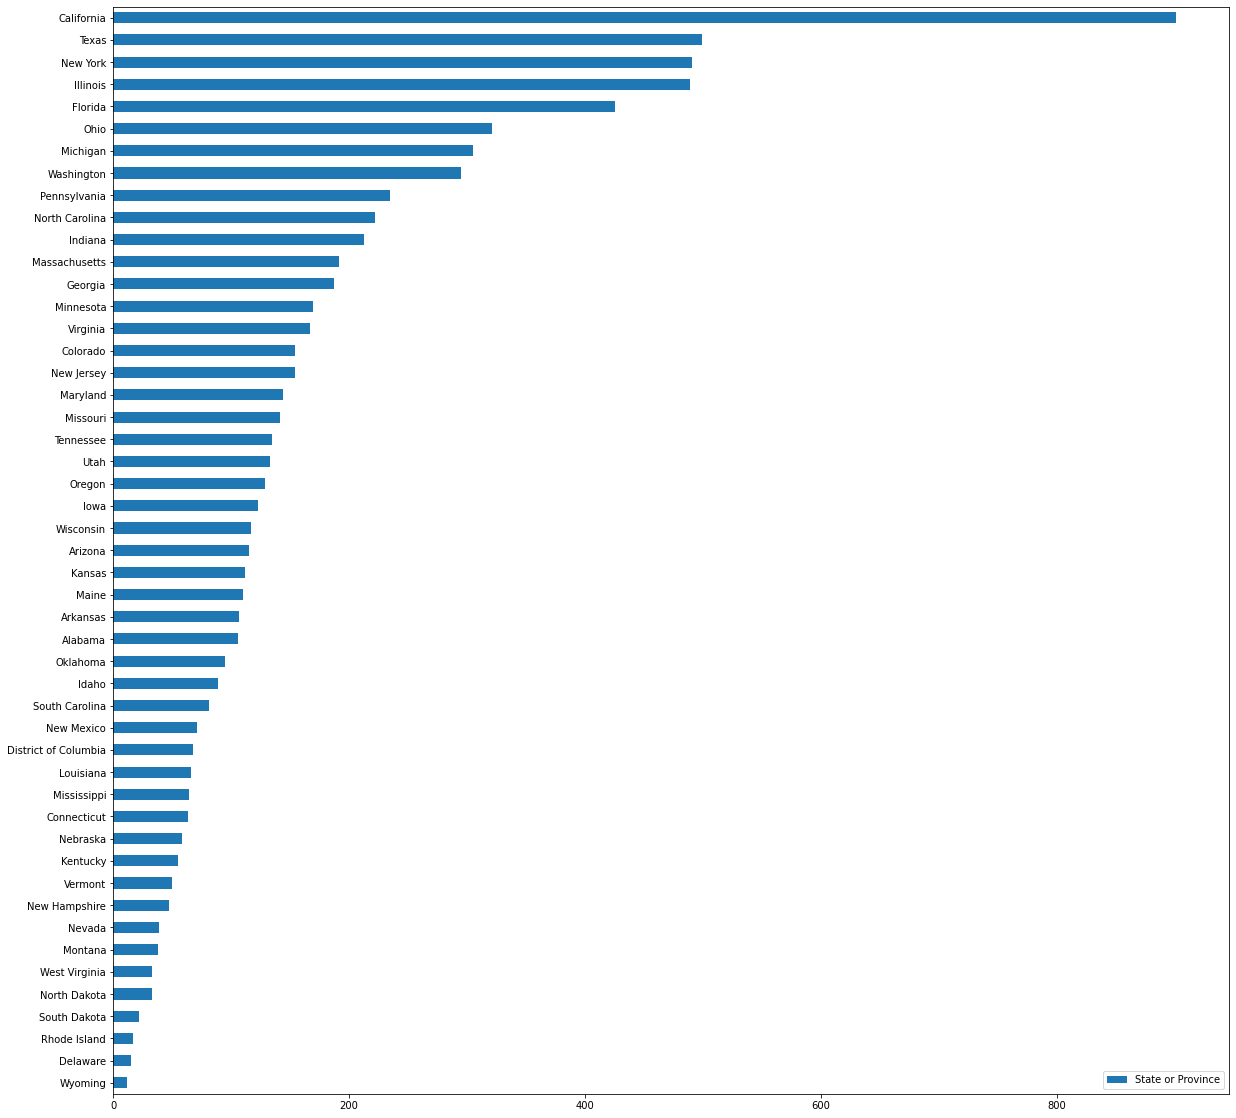

In [246]:
df_state = pd.DataFrame(df_data['State or Province'].value_counts())
df_state.sort_values(by = "State or Province").plot.barh(figsize = (20,20))

<AxesSubplot: >

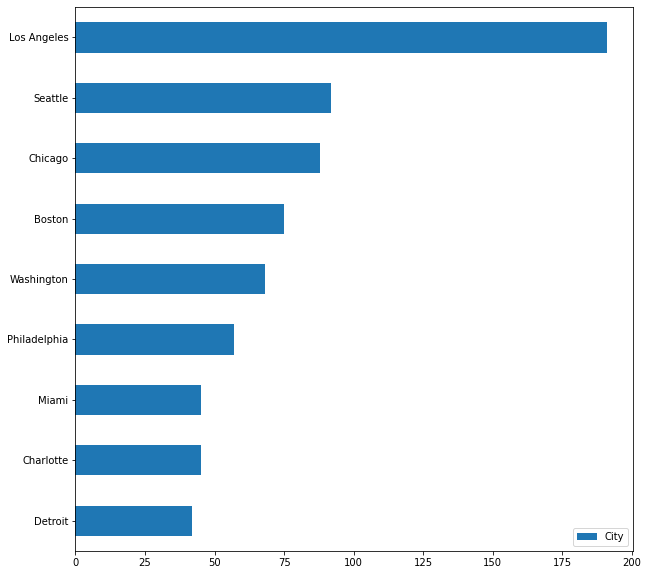

In [247]:
df_city = pd.DataFrame(df_data['City'].value_counts())
df_city[1:10].sort_values(by = "City").plot.barh(figsize = (10,10))

Maximum cars are sold in the Central Region. California tops the list of max cars sold by state, followed by Texas which is as expected. Los Angeles tops the list of most cars sold by city.

In [248]:
#removing the non-significant columns from the dataframe
df_data = df_data.drop(['Sales_ID','engine', 'name', 'torque', 'sold', 'Region', 'State or Province', 'City', 'seller_type', 'owner'], axis = 1)

#calculating the age of the vehicles from the current date
import datetime
today = datetime.date.today()
year = today.year

df_data['year'] = year - df_data['year']
df_data.rename(columns = {'year':'age'}, inplace = True)

df_data.head()

,age,selling_price,km_driven,fuel,transmission,mileage,max_power,seats
0,9,450000,145500,Diesel,Manual,23.40,74.00,5
1,9,370000,120000,Diesel,Manual,21.14,103.52,5
2,17,158000,140000,Petrol,Manual,17.70,78.00,5
3,13,225000,127000,Diesel,Manual,23.00,90.00,5
4,16,130000,120000,Petrol,Manual,16.10,88.20,5


Performing transformation on the data to run Regression Model

In [249]:
#creating dummies for the categorical data
df_data = pd.get_dummies(df_data)

df_data.head()

,age,selling_price,km_driven,mileage,max_power,seats,fuel_CNG,fuel_Diesel,fuel_LPG,fuel_Petrol,transmission_Automatic,transmission_Manual
0,9,450000,145500,23.40,74.00,5,0,1,0,0,0,1
1,9,370000,120000,21.14,103.52,5,0,1,0,0,0,1
2,17,158000,140000,17.70,78.00,5,0,0,0,1,0,1
3,13,225000,127000,23.00,90.00,5,0,1,0,0,0,1
4,16,130000,120000,16.10,88.20,5,0,0,0,1,0,1


In [251]:
#removing the target variable before splitting data into test and train
X = df_data.drop('selling_price', axis = 1)

#reshaping the array containing selling prices of cars
Y = df_data.iloc[:, 1].values.reshape(-1,1)

Splitting the dataset into training and test

In [252]:
#splitting the dataset into 70:30
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.25, random_state=888)

In [253]:
print("Shape of X_train: ",X_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_train: ",Y_train.shape)
print("Shape of y_test",Y_test.shape)

Shape of X_train:  (5929, 11)
Shape of X_test:  (1977, 11)
Shape of y_train:  (5929, 1)
Shape of y_test (1977, 1)


Implementing Linear Regression

In [254]:
from sklearn.linear_model import LinearRegression
#creating linear regression object
reg = LinearRegression()

#training the model
reg.fit(X_train, Y_train)

LinearRegression()

In [255]:
from sklearn.model_selection import cross_val_score

#predicting the cross validation score with 10 folds on the training dataset
cv_linear = cross_val_score(estimator = reg, X=X_train, y=Y_train, cv = 10)
print(cv_linear.mean())

0.6530730323253267


In [256]:
from sklearn.metrics import r2_score

#r2 Score on the training data
Y_pred_linear_train = reg.predict(X_train)
r2_score_linear_train = r2_score(Y_train, Y_pred_linear_train)

print(r2_score_linear_train)

0.6586918238732471


In [257]:
#r2_score on the test data

Y_pred_linear_test = reg.predict(X_test)
r2_score_linear_test = r2_score(Y_test, Y_pred_linear_test)

print(r2_score_linear_test)

0.6882841519301663


In [258]:
from sklearn.metrics import mean_squared_error

#predicting the RMSE for the test set
rmse_linear = (np.sqrt(mean_squared_error(Y_test, Y_pred_linear_test)))
print(rmse_linear)

489864.8466634033


In [259]:
#train and test score of linear regression model
print(reg.score(X_train, Y_train))
print(reg.score(X_test, Y_test))

0.6586918238732471
0.6882841519301663


As shown by the above evaluation metrics (High RMSE, low r2 Score), the simple Linear Model isn't able to explain the reponse variable. So we need to try out other Regressions with hyper parameter tuning to see if we can build a better model.

Polynomial Regression - 2nd Degree

In [260]:
from sklearn.preprocessing import PolynomialFeatures

#creating polynomial regression object
poly_reg = PolynomialFeatures(degree = 2)

#transforming and fitting our training predictors variables
X_poly = poly_reg.fit_transform(X_train)
poly_reg.fit(X_poly, Y_train)
regressor_poly2 = LinearRegression()
regressor_poly2.fit(X_poly, Y_train)

LinearRegression()

In [261]:
#cross validation score on the training datasets
cv_poly2 = cross_val_score(estimator = regressor_poly2, X = X_train, y = Y_train, cv = 10)
print(cv_poly2.mean())

0.6530730323253267


In [262]:
#calculating the r2 score
Y_pred_poly2_train = regressor_poly2.predict(poly_reg.fit_transform(X_train))
r2_score_poly2_train = r2_score(Y_train, Y_pred_poly2_train)

print(r2_score_poly2_train)

0.8918372729465802


In [263]:
Y_pred_poly2_test = regressor_poly2.predict(poly_reg.fit_transform(X_test))
r2_score_poly2_test = r2_score(Y_test, Y_pred_poly2_test)

print(r2_score_poly2_test)

0.9117541206122642


In [264]:
#calculating the RMSE on the test result
rmse_poly2 = np.sqrt(mean_squared_error(Y_test, Y_pred_poly2_test))

print(rmse_poly2)

260641.7909816426


In [267]:
#train and test score of Polynomial Regression Model
print(regressor_poly2.score(X_poly, Y_train))
print(regressor_poly2.score(poly_reg.fit_transform(X_test), Y_test))

0.8918372729465802
0.9117541206122642


Now, Implementing Ridge Regression

In [268]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

steps = [
    ('scalar', StandardScaler()),
    ('poly', PolynomialFeatures(degree=3)),
    ('model', Ridge(alpha=10000, fit_intercept=True))
]

ridge_pipe = Pipeline(steps)
ridge_pipe.fit(X_train, Y_train)

Pipeline(steps=[('scalar', StandardScaler()),
                ('poly', PolynomialFeatures(degree=3)),
                ('model', Ridge(alpha=10000))])

In [269]:
# Cross Validation Score on the training dataset
cv_ridge = cross_val_score(estimator = ridge_pipe, X = X_train, y = Y_train, cv = 10)

cv_ridge.mean()

0.8495075644496473

In [270]:
#R2 score of the training dataset
Y_pred_ridge_train = ridge_pipe.predict(X_train)
r2_score_ridge_train = r2_score(Y_train, Y_pred_ridge_train)

r2_score_ridge_train

0.9022830110917424

In [271]:
#R2 score of the test dataset
Y_pred_ridge_test = ridge_pipe.predict(X_test)
r2_score_ridge_test = r2_score(Y_test, Y_pred_ridge_test)

r2_score_ridge_test

0.8317040928186714

In [272]:
#calculating the RMSE on the Test dataset
rmse_ridge = (np.sqrt(mean_squared_error(Y_test, Y_pred_ridge_test)))
rmse_ridge

359942.8994913191

In [275]:
#Train and test score of Ridge Regression
print(ridge_pipe.score(X_train, Y_train))
print(ridge_pipe.score(X_test, Y_test))

0.9022830110917424
0.8317040928186714


Implementing Lasso Regression

In [286]:
from sklearn.linear_model import Lasso

steps = [
    ('scalar', StandardScaler()),
    ('poly', PolynomialFeatures(degree=3)),
    ('model', Lasso(alpha=2.36, fit_intercept=True, tol = 0.05, max_iter=1000))
]

lasso_pipe = Pipeline(steps)
lasso_pipe.fit(X_train, Y_train)

Pipeline(steps=[('scalar', StandardScaler()),
                ('poly', PolynomialFeatures(degree=3)),
                ('model', Lasso(alpha=2.36, tol=0.05))])

In [289]:
#cross validation on the training datset
cv_lasso = cross_val_score(estimator = lasso_pipe, X = X_train, y = Y_train, cv = 10)

cv_lasso.mean()

0.832321020746839

In [290]:
#r2 score on the training dataset
Y_pred_lasso_train = lasso_pipe.predict(X_train)
r2_score_lasso_train = r2_score(Y_train, Y_pred_lasso_train)

r2_score_lasso_train

0.9236288877352261

In [291]:
#r2 score on the test dataset
Y_pred_lasso_test = lasso_pipe.predict(X_test)
r2_score_lasso_test = r2_score(Y_test, Y_pred_lasso_test)

r2_score_lasso_test

0.9280427421414319

In [294]:
#calculating the rmse for lasso regression
rmse_lasso = (np.sqrt(mean_squared_error(Y_test, Y_pred_lasso_test)))

rmse_lasso

235360.8024097867

In [295]:
#Train and test score of lasso Regression
print(lasso_pipe.score(X_train, Y_train))
print(lasso_pipe.score(X_test, Y_test))

0.9236288877352261
0.9280427421414319


Implementing the Support Vector Regression

In [310]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_Y = StandardScaler()

X_scaled = sc_X.fit_transform(X_train)
Y_scaled = sc_Y.fit_transform(Y_train.reshape(-1,1))

X_scaled_test = sc_X.fit_transform(X_test)
Y_scaled_test = sc_Y.fit_transform(Y_test.reshape(-1,1))

In [311]:
#importing the required library
from sklearn.svm import SVR
reg_svr = SVR(kernel = 'rbf', gamma = 'scale')

reg_svr.fit(X_scaled, Y_scaled.ravel())

SVR()

In [312]:
#calculating the cross validation score on training dataset
cv_svr = cross_val_score(estimator = reg_svr, X = X_scaled, y = Y_scaled.ravel(), cv = 10)

cv_svr.mean()

0.9302564152413048

In [313]:
#calculating the r2 score on training dataset
y_pred_svr_train = reg_svr.predict(X_scaled)
r2_score_svr_train = r2_score(Y_scaled, y_pred_svr_train)

r2_score_svr_train

0.9371113752079433

In [320]:
#calculating the r2 score on test dataset
y_pred_svr_test = reg_svr.predict(X_scaled_test)
r2_score_svr_test = r2_score(Y_scaled_test, y_pred_svr_test)

r2_score_svr_test

0.8826033004172963

In [317]:
#calculating the RMSE
rmse_svr = (np.sqrt(mean_squared_error(sc_Y.inverse_transform(Y_scaled_test.reshape(-1,1)), sc_Y.inverse_transform(y_pred_svr_test.reshape(-1,1)))))

rmse_svr

300624.7810061331

In [323]:
#train and test score of SVR
print(reg_svr.score(X_scaled, Y_scaled))
print(reg_svr.score(X_scaled_test, Y_scaled_test))

0.9371113752079433
0.8826033004172963


Implementing regression trees

In [324]:
from sklearn.tree import DecisionTreeRegressor

#initializing the decision tree object
reg_dt = DecisionTreeRegressor(random_state = 0)

#training the model
reg_dt.fit(X_train, Y_train)

DecisionTreeRegressor(random_state=0)

In [347]:
#calculating cross validation score
cross_val_score_dt = cross_val_score(estimator = reg_dt, X = X_train, y = Y_train, cv = 10)

cross_val_score_dt.mean()

0.9513692750126822

In [328]:
#calculating the r2 score on training dataset
y_pred_train_dt = reg_dt.predict(X_train)
r2_score_dt_train = r2_score(Y_train, y_pred_train_dt)

r2_score_dt_train

0.9993310174039802

In [345]:
#calculating the r2 score on the test dataset
y_pred_test_dt = reg_dt.predict(X_test)
r2_score_dt_test = r2_score(Y_test, y_pred_test_dt)

r2_score_dt_test

0.9400794703661806

In [331]:
#calculating the rmse score
rmse_dt = (np.sqrt(mean_squared_error(Y_test, y_pred_test_dt)))

rmse_dt

489864.8466634033

In [343]:
#train and test score of decision tree
print(reg_dt.score(X_train, Y_train))
print(reg_dt.score(X_test, Y_test))

0.9993310174039802
0.9400794703661806


Implementing Random Forest Regression

In [337]:
from sklearn.ensemble import RandomForestRegressor

#initializing regressor object
reg_rf = RandomForestRegressor(n_estimators = 1000, random_state = 0)

#training the model
reg_rf.fit(X_train, Y_train.ravel())

RandomForestRegressor(n_estimators=1000, random_state=0)

In [338]:
#calculating the cross validation score
cross_val_score_rf = cross_val_score(estimator = reg_rf, X = X_train, y = Y_train.ravel(), cv = 10)

cross_val_score_rf.mean()

0.9691203966992626

In [339]:
#calculating the r2 score on the training datset
y_pred_train_rf = reg_rf.predict(X_train)

r2_score_rf_train = r2_score(Y_train, y_pred_train_rf)

r2_score_rf_train

0.9956633368339358

In [340]:
#calculating the r2 score on the test datset
y_pred_test_rf = reg_rf.predict(X_test)

r2_score_rf_test = r2_score(Y_test, y_pred_test_rf)

r2_score_rf_test

0.9595446046640248

In [341]:
#calculating the rmse
rmse_rf = (np.sqrt(mean_squared_error(Y_test, y_pred_test_rf)))

rmse_rf

176475.7589561418

In [346]:
#performance of random forest regression on training and test data
print(reg_rf.score(X_train, Y_train))
print(reg_rf.score(X_test, Y_test))

0.9956633368339358
0.9595446046640248


Analyzing the different Regression Models

In [350]:
#creating a dataframe containing evaluation metrics of different regressions techniques

#initializing the list of lists
data_models = [['LinearRegression', cv_linear.mean(), r2_score_linear_train, r2_score_linear_test, rmse_linear],
              ['PolynomialRegression', cv_poly2.mean(), r2_score_poly2_train, r2_score_poly2_test, rmse_poly2],
              ['RidgeRegression', cv_ridge.mean(), r2_score_ridge_train, r2_score_ridge_test, rmse_ridge],
              ['LassoRegression', cv_lasso.mean(), r2_score_lasso_train, r2_score_lasso_test, rmse_lasso],
              ['SupportVectorRegression', cv_svr.mean(), r2_score_svr_train, r2_score_svr_test, rmse_svr],
              ['DecisionTreeRegression', cross_val_score_dt.mean(), r2_score_dt_train, r2_score_dt_test, rmse_dt],
              ['RandomForestRegression', cross_val_score_rf.mean(), r2_score_rf_train, r2_score_rf_test, rmse_rf]]

#create the pandas dataframe
df_models = pd.DataFrame(data_models, columns = ['Model', 'CrossValidation Score', 'R2 Training Score',
                                                'R2 Test Score', 'RMSE'])

In [352]:
df_models

,Model,CrossValidation Score,R2 Training Score,R2 Test Score,RMSE
0,LinearRegression,0.653073,0.658692,0.688284,489864.846663
1,PolynomialRegression,0.653073,0.891837,0.911754,260641.790982
2,RidgeRegression,0.849508,0.902283,0.831704,359942.899491
3,LassoRegression,0.832321,0.923629,0.928043,235360.802410
4,SupportVectorRegression,0.930256,0.937111,0.882603,300624.781006
5,DecisionTreeRegression,0.951369,0.999331,0.940079,489864.846663
6,RandomForestRegression,0.969120,0.995663,0.959545,176475.758956


Visualizing Models Performance

<AxesSubplot: xlabel='CrossValidation Score', ylabel='Model'>

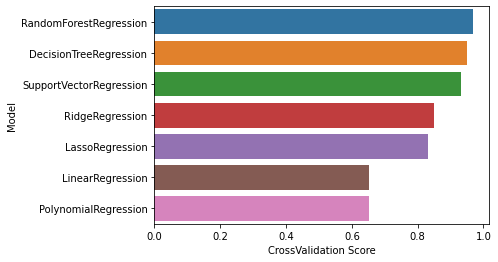

In [356]:
df_models.sort_values(by = ['CrossValidation Score'], ascending = False, inplace = True)
sns.barplot(x = 'CrossValidation Score', y = 'Model', data = df_models)

<AxesSubplot: xlabel='R2 Test Score', ylabel='Model'>

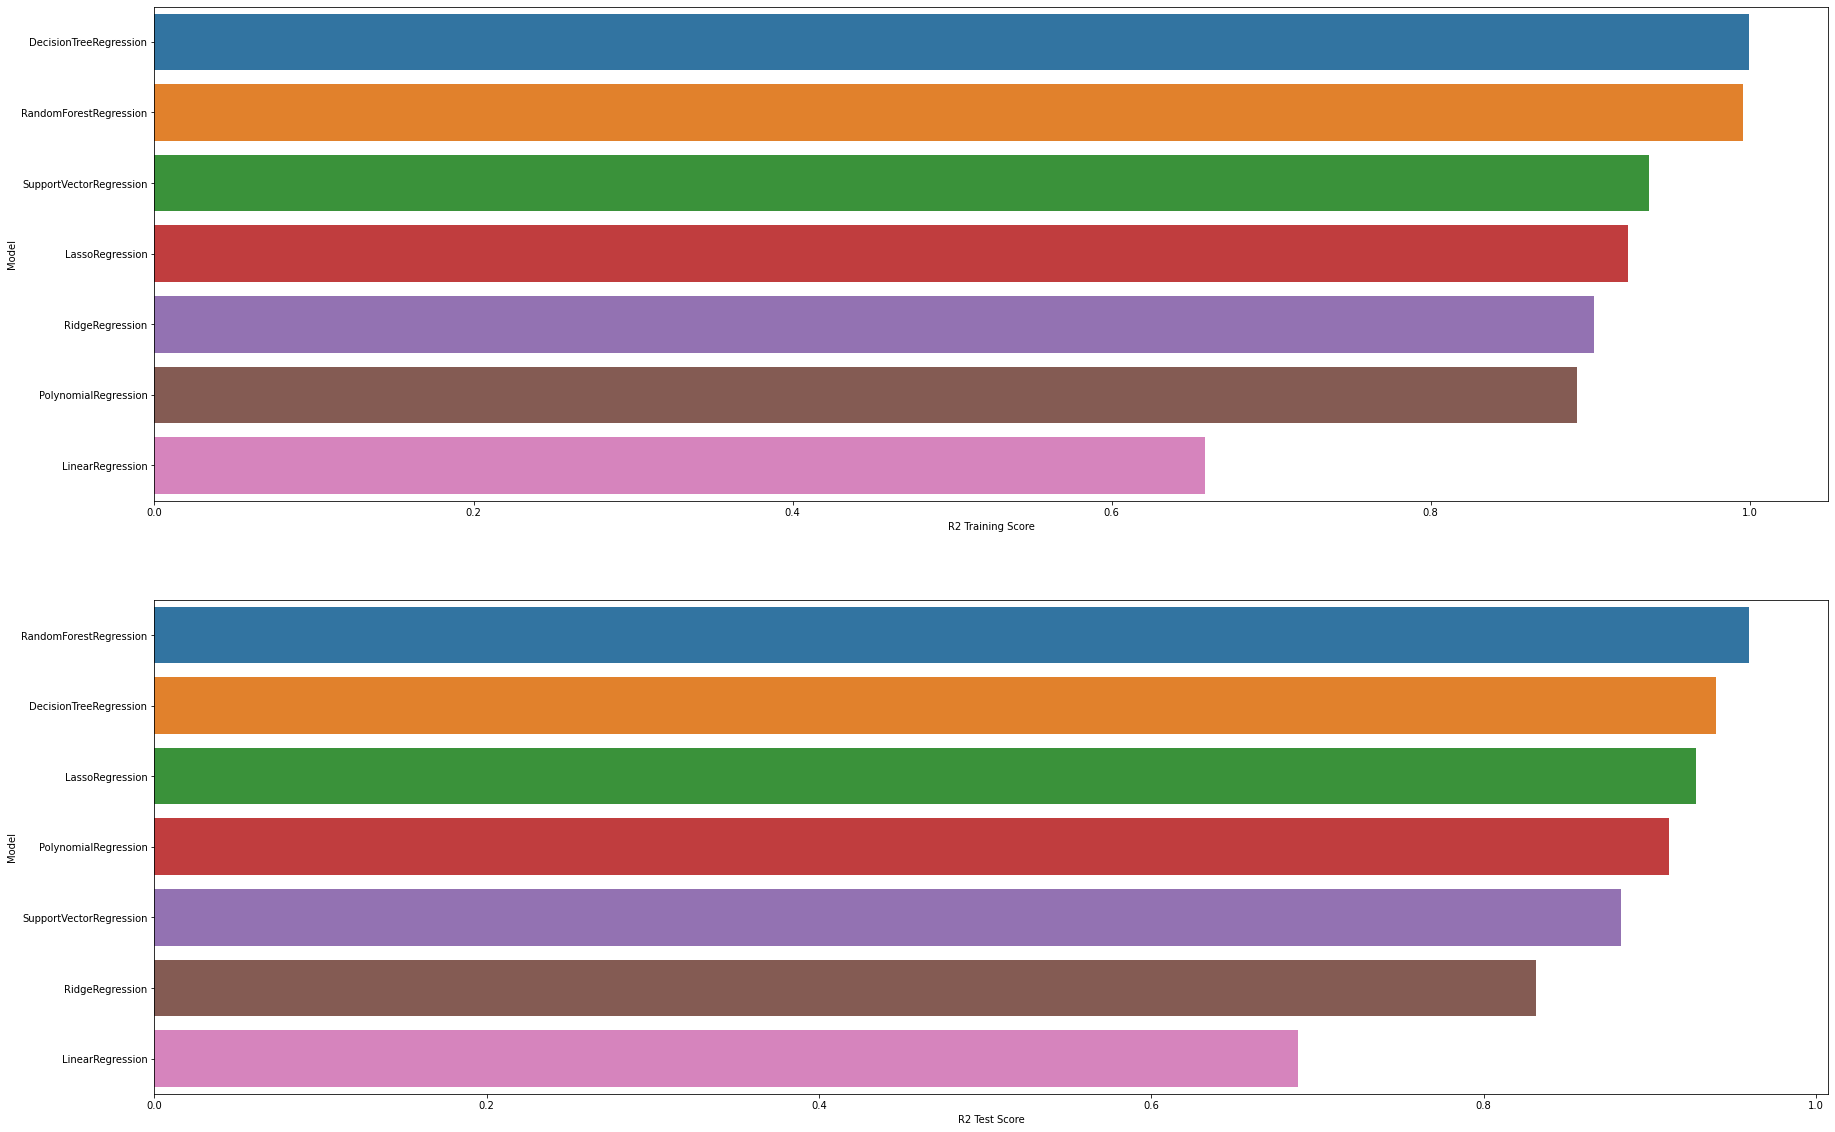

In [362]:
f, axes = plt.subplots(2,1, figsize =(30,20))

df_models.sort_values(by = ['R2 Training Score'], ascending = False, inplace = True)
sns.barplot(x = 'R2 Training Score', y = 'Model', data = df_models, ax = axes[0])

df_models.sort_values(by = ['R2 Test Score'], ascending = False, inplace = True)
sns.barplot(x = 'R2 Test Score', y = 'Model', data = df_models, ax = axes[1])

<AxesSubplot: xlabel='RMSE', ylabel='Model'>

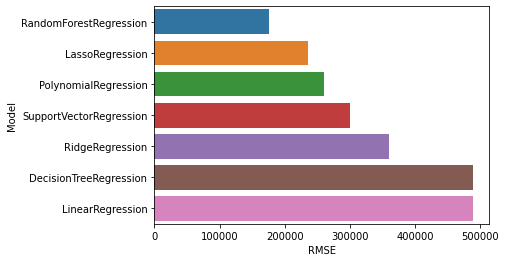

In [366]:
df_models.sort_values(by = ['RMSE'], ascending = True, inplace = True)
sns.barplot(x = 'RMSE', y = 'Model', data = df_models)

# Conclusion
As visible, the prediction provided by Random Forest Regression is the most accurate results with less variance but it also takes the most amount of time to run and complete it's bootstraping and aggregation tasks.
The 7 regression models offers different level of accuracy, processing time and resource usage. Thus, it is upto the requirements to decide which model makes more sense to use.